In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
from mpl_toolkits.basemap import Basemap

In [3]:
xls = pd.ExcelFile('deliveries.xlsx')

In [4]:
deliveries = pd.read_excel(xls, '2_months_deliverys_2013', usecols='A:D, F:H, J,K,L,O')

In [5]:
deliveries.columns

Index(['ContainerNo', 'Container type and size ', 'Import or Export', 'Time',
       'Port', 'Port_Long ', 'Port_Lat ', 'City', 'City_Long', 'City_Lat ',
       'Job No'],
      dtype='object')

In [6]:
filt = deliveries['City'].isnull()

In [7]:
deliveries[filt]

,ContainerNo,Container type and size,Import or Export,Time,Port,Port_Long,Port_Lat,City,City_Long,City_Lat,Job No
29391,TGHU4594680,40DV,Import,2013-01-23 00:00:00,Southampton,-1.3715,50.8877,NaN,NaN,NaN,30907670
29392,MEDU4077873,40DV,Import,2013-01-23 00:00:00,Southampton,-1.3715,50.8877,NaN,NaN,NaN,30907640
29393,TRLU5904610,40HC,Import,2013-01-23 00:00:00,Southampton,-1.3715,50.8877,NaN,NaN,NaN,30907800
29394,DFSU6550564,40HC,Import,2013-03-11 00:00:00,Southampton,-1.3715,50.8877,NaN,NaN,NaN,31425760
29395,MSCU1203966,20DV,Import,2013-03-12 00:00:00,Southampton,-1.3715,50.8877,NaN,NaN,NaN,31440910
...,...,...,...,...,...,...,...,...,...,...,...
52696,MSCU1829543,20DV,Export,2013-01-30 14:00:00,Grangemouth,-3.7046,56.0241,NaN,NaN,NaN,30961400
52697,MSCU4834944,40DV,Export,2013-01-17 09:00:00,Grangemouth,-3.7046,56.0241,NaN,NaN,NaN,30816790
60880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60881,CANCELLED,126,NaN,60880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
deliveries.dropna(inplace=True)

In [9]:
deliveries.columns

Index(['ContainerNo', 'Container type and size ', 'Import or Export', 'Time',
       'Port', 'Port_Long ', 'Port_Lat ', 'City', 'City_Long', 'City_Lat ',
       'Job No'],
      dtype='object')

In [285]:
deliveries = deliveries[(deliveries['ContainerNo'] != 'CANCELLED')| (deliveries['ContainerNo'] != 'REJECTED')]

In [309]:
deliveries = deliveries.rename(columns={'Container type and size ':'ContainerTypeSize', 'Port_Long ':'Port_Long', 'Port_Lat ': 'Port_Lat', 'City_Lat ': 'City_Lat', 'Time':'TimeStamp'})

In [287]:
deliveries['TimeStamp'] = pd.to_datetime(deliveries['TimeStamp'])

In [288]:
deliveries['TimeStamp'].dt.date.max(), deliveries['TimeStamp'].dt.date.min()

(datetime.date(2013, 3, 16), datetime.date(2013, 1, 17))

In [289]:
dates = pd.date_range(deliveries['TimeStamp'].dt.date.min(), deliveries['TimeStamp'].dt.date.max())

## Exports

In [290]:
exports = deliveries[deliveries['Import or Export'] == 'Export']

In [291]:
exports['Date'] = exports['TimeStamp'].dt.date
exports['Date'] = pd.to_datetime(exports['Date'])

In [292]:
exports = exports[['ContainerNo', 'ContainerTypeSize', 'Import or Export', 'TimeStamp', 'Date', 'Port', 'Port_Long', 'Port_Lat', 'City', 'City_Long', 'City_Lat', 'Job No']] 

In [293]:
exports.head()

,ContainerNo,ContainerTypeSize,Import or Export,TimeStamp,Date,Port,Port_Long,Port_Lat,City,City_Long,City_Lat,Job No
33298,MSCU7838835,40HC,Export,2013-01-25 13:00:00,2013-01-25,Liverpool,-3.0194,53.4663,Liverpool,-2.9689,53.3996,30928490
33300,TTNU9306941,40HC,Export,2013-02-17 06:30:00,2013-02-17,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31151560
33301,TCNU8743409,40HC,Export,2013-02-17 12:45:00,2013-02-17,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31151810
33302,MEDU8521604,40HC,Export,2013-02-25 08:00:00,2013-02-25,Liverpool,-3.0194,53.4663,Liverpool,-2.9689,53.3996,31209250
33303,GLDU0807143,40HC,Export,2013-02-24 07:00:00,2013-02-24,Felixstowe,1.3141,51.9591,Liverpool,-2.9689,53.3996,31221380


In [294]:
container_types = list(exports['ContainerTypeSize'].unique())
container_types

['40HC', '40DV', '20DV', '40HR', '20RE', '40OT', '20OT', '40FL', '20FL']

In [295]:
container_group = exports.groupby(['ContainerTypeSize'])

val_counts_40HC = container_group.get_group('40HC')['Date'].value_counts()
val_counts_40HC_df = pd.DataFrame(val_counts_40HC)
val_counts_40HC_df = val_counts_40HC_df.rename(columns={'Date':'ValCount'})
val_counts_40HC_df.index.name = 'Date' 

val_counts_40DV = container_group.get_group('40DV')['Date'].value_counts()
val_counts_40DV = pd.DataFrame(val_counts_40DV)
val_counts_40DV = val_counts_40DV.rename(columns={'Date':'40DV'})
val_counts_40DV.index.name = 'Date'

In [296]:
def get_df(container_name):
    val_counts = container_group.get_group(container_name)['Date'].value_counts()
    val_counts_df = pd.DataFrame(val_counts)
    val_counts_df = val_counts_df.rename(columns={'Date':container_name})
    val_counts_df.index.name = 'Date'

    return val_counts_df

In [297]:
df_20DV = get_df('20DV')
df_40HR = get_df('40HR')
df_20RE = get_df('20RE')
df_40OT = get_df('40OT')
df_20OT = get_df('20OT')
df_40FL = get_df('40FL')
df_20FL = get_df('20FL')

In [298]:
exp_df = pd.DataFrame() 
exp_df['Date']= pd.to_datetime(dates) # Create a dataframe with the dates in the index
# exp_df = exp_df.set_index('Date')

In [299]:
merged_df = pd.merge(exp_df, val_counts_40HC_df, how='left', left_on='Date', right_on='Date')
merged_df = merged_df.rename(columns={'ValCount':'40HC'})

merged_df = pd.merge(merged_df, val_counts_40DV, how='left', left_on='Date', right_on='Date') 
merged_df = pd.merge(merged_df, df_20DV, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_40HR, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_20RE, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_40OT, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_20OT, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_40FL, how='left', left_on='Date', right_on='Date')
merged_df = pd.merge(merged_df, df_20FL, how='left', left_on='Date', right_on='Date')

In [300]:
merged_df = merged_df.fillna(0)
merged_df = merged_df.astype({'40HC':int,'40DV':int,'20DV':int,'40HR':int,'20RE':int,'40OT':int,'20OT':int,'40FL':int,'20FL':int})
merged_df = merged_df.set_index('Date')

In [301]:
merged_df.head()

,40HC,40DV,20DV,40HR,20RE,40OT,20OT,40FL,20FL
Date,,,,,,,,,
2013-01-17,373,50,159,1,0,2,1,0,0
2013-01-18,331,58,156,11,1,1,0,2,0
2013-01-19,23,4,1,0,0,0,0,0,0
2013-01-20,2,0,0,0,0,0,0,0,0
2013-01-21,268,63,196,8,4,2,4,2,0


In [302]:
bottom_20DV = list(np.add(merged_df['40HC'],merged_df['40DV']))
bottom_40HR = list(np.add(bottom_20DV, merged_df['20DV']))
bottom_20RE = list(np.add(bottom_40HR, merged_df['40HR']))
bottom_40OT = list(np.add(bottom_20RE, merged_df['20RE']))
bottom_20OT = list(np.add(bottom_40OT, merged_df['40OT']))
bottom_40FL = list(np.add(bottom_20OT, merged_df['20OT']))
bottom_20FL = list(np.add(bottom_40FL, merged_df['40FL']))

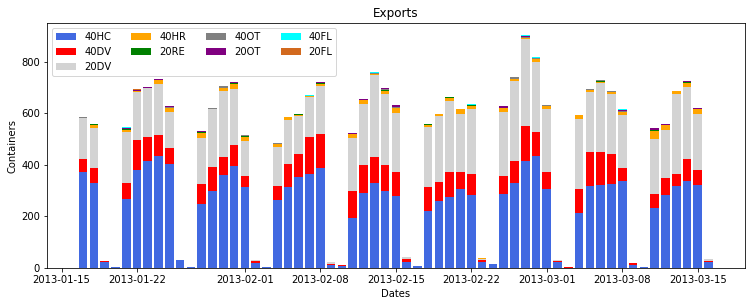

In [303]:
plt.figure(figsize=(12.5, 4.5))
plt.bar(merged_df.index, merged_df['40HC'], label='40HC', color='royalblue')
plt.bar(merged_df.index, merged_df['40DV'], bottom=merged_df['40HC'], label = '40DV', color='red')
plt.bar(merged_df.index, merged_df['20DV'], bottom=bottom_20DV, label = '20DV', color='lightgray')
plt.bar(merged_df.index, merged_df['40HR'], bottom=bottom_40HR, label = '40HR', color='orange')
plt.bar(merged_df.index, merged_df['20RE'], bottom=bottom_20RE, label = '20RE', color='green')
plt.bar(merged_df.index, merged_df['40OT'], bottom=bottom_40OT, label = '40OT', color='gray')
plt.bar(merged_df.index, merged_df['20OT'], bottom=bottom_20OT, label = '20OT', color='purple')
plt.bar(merged_df.index, merged_df['40FL'], bottom=bottom_40FL, label = '40FL', color= 'cyan')
plt.bar(merged_df.index, merged_df['20FL'], bottom=bottom_20FL, label = '20FL', color='chocolate')
plt.xlabel('Dates')
plt.ylabel('Containers')
plt.title('Exports')
plt.legend(loc='upper left', ncol=4)
plt.grid(False)
plt.savefig('export_container_type_wise', bbox_inches='tight')
plt.show()

In [304]:
ma_40HC = merged_df['40HC'].ewm(span=7, adjust=False).mean()
ma_40DV = merged_df['40DV'].ewm(span=7, adjust=False).mean()
ma_20DV = merged_df['20DV'].ewm(span=7, adjust=False).mean()

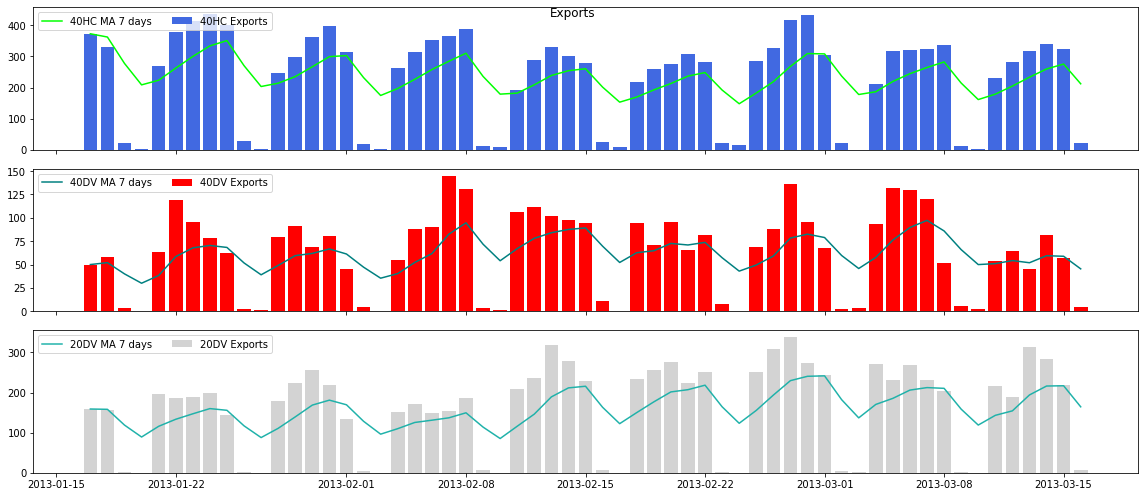

In [305]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(16, 7))

ax1.bar(merged_df.index, merged_df['40HC'], label = '40HC Exports', color='royalblue')
ax1.plot(ma_40HC, label='40HC MA 7 days', color='lime')
ax1.grid(False)
# ax1.set_title('40HC Exports')
ax1.legend(loc='upper left', ncol=2)

ax2.bar(merged_df.index,merged_df['40DV'], label = '40DV Exports', color='red')
ax2.plot(ma_40DV, label='40DV MA 7 days', color='teal')
ax2.grid(False)
# ax2.set_title('40DV')
ax2.legend(loc='upper left', ncol=2)

ax3.bar(merged_df.index,merged_df['20DV'], label = '20DV Exports', color='lightgray')
ax3.plot(ma_20DV, label='20DV MA 7 days', color='lightseagreen')
ax3.grid(False)
# ax3.set_title('20DV')
ax3.legend(loc='upper left', ncol=2)

plt.suptitle('Exports')
plt.tight_layout()
plt.savefig('export_container_moving_averages', bbox_inches='tight')
plt.show()


## Plotting the exporters locations

In [306]:
exporters_loc = exports[['City', 'City_Long', 'City_Lat']].copy()
exporters_loc = exporters_loc.drop_duplicates()
exporters_loc

,City,City_Long,City_Lat
33298,Liverpool,-2.9689,53.3996
33353,Ipswich,1.1560,52.0530
33410,Immingham,-0.2245,53.6117
33465,Dumbarton,-4.5489,55.9398
33521,Dalmuir,-4.4255,55.9099
...,...,...,...
60414,Swanley,0.1722,51.3985
60584,Thatcham,-1.2577,51.4037
60588,Wrexham,-2.9935,53.0458
60876,Aberdare,-3.4345,51.7170


In [307]:
london_lon, london_lat = 0.052, 51.5367


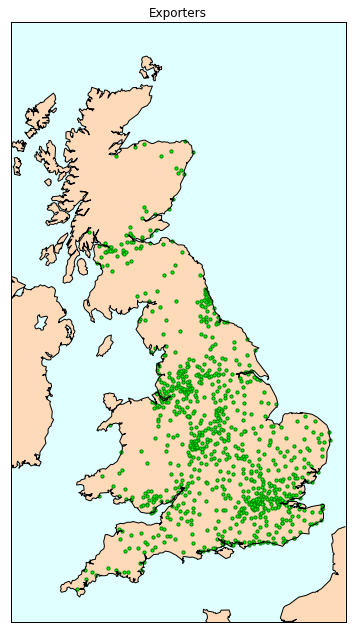

In [308]:
fig = plt.figure(figsize=(6,12))
m = Basemap(llcrnrlon=-7, llcrnrlat=49.5, urcrnrlon=3.5, urcrnrlat=59.5, resolution='i', projection='cass', lon_0=-4.36, lat_0=54.7)
m.scatter(exporters_loc['City_Long'].tolist(), exporters_loc['City_Lat'].tolist(), latlon=True, s=10, zorder=2, marker='o', color='lime', edgecolor='green')
m.drawcoastlines()
m.fillcontinents(color='peachpuff',lake_color='lightcyan', zorder=1)
# m.drawparallels(np.arange(-40,61.,2.))
# m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='lightcyan')
plt.savefig('exporters_locations', bbox_inches='tight')
plt.title("Exporters")
plt.show()

('64bit', 'WindowsPE')

## Imports

In [310]:
imports = deliveries[deliveries['Import or Export'] == 'Import']

In [311]:
imports['Date'] = imports['TimeStamp'].dt.date
imports['Date'] = pd.to_datetime(imports['Date'])

In [312]:
imports = imports[['ContainerNo', 'ContainerTypeSize', 'Import or Export', 'TimeStamp', 'Date', 'Port', 'Port_Long', 'Port_Lat', 'City', 'City_Long', 'City_Lat', 'Job No']] 

In [313]:
imports.head()

,ContainerNo,ContainerTypeSize,Import or Export,TimeStamp,Date,Port,Port_Long,Port_Lat,City,City_Long,City_Lat,Job No
0,TRHU1508700,20DV,Import,2013-02-22 09:00:00,2013-02-22,Felixstowe,1.3141,51.9591,Halesowen,-2.0234,52.4594,31206600
1,INBU3708013,20DV,Import,2013-03-07 09:30:00,2013-03-07,Southampton,-1.4150,50.9028,Halesowen,-2.0234,52.4594,31318710
2,MSCU5020747,40DV,Import,2013-02-08 09:00:00,2013-02-08,Felixstowe,1.3141,51.9591,Halesowen,-2.0234,52.4594,31039990
3,TCLU5890517,40HC,Import,2013-03-04 09:00:00,2013-03-04,Liverpool,-3.0194,53.4663,Halesowen,-2.0234,52.4594,31250650
4,GLDU7267350,40HC,Import,2013-02-04 09:00:00,2013-02-04,Liverpool,-3.0194,53.4663,Halesowen,-2.0234,52.4594,30955050


In [314]:
container_types_import = list(imports['ContainerTypeSize'].unique())
container_types_import

['20DV',
 '40DV',
 '40HC',
 '40HR',
 '40FL',
 '20OT',
 '40OT',
 '20FL',
 '20RE',
 '40HP']

In [315]:
container_group_imports = imports.groupby(['ContainerTypeSize'])

In [316]:
def get_df2(container_name, container_group):
    val_counts = container_group.get_group(container_name)['Date'].value_counts()
    val_counts_df = pd.DataFrame(val_counts)
    val_counts_df = val_counts_df.rename(columns={'Date':container_name})
    val_counts_df.index.name = 'Date'

    return val_counts_df

In [317]:
df_20DV_import = get_df2('20DV',container_group_imports)
df_40DV_import = get_df2('40DV',container_group_imports)
df_40HC_import = get_df2('40HC',container_group_imports)
df_40HR_import = get_df2('40HR',container_group_imports)
df_40FL_import = get_df2('40FL',container_group_imports)
df_20OT_import = get_df2('20OT',container_group_imports)
df_40OT_import = get_df2('40OT',container_group_imports)
df_20FL_import = get_df2('20FL',container_group_imports)
df_20RE_import = get_df2('20RE',container_group_imports)
df_40HP_import = get_df2('40HP',container_group_imports)

In [318]:
imp_df = pd.DataFrame() 
imp_df['Date']= pd.to_datetime(dates) # Create a dataframe with the dates in the index

In [319]:
merged_df_imp = pd.merge(imp_df, df_20DV_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40DV_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40HC_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40HR_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40FL_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_20OT_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40OT_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_20FL_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_20RE_import, how='left', left_on='Date', right_on='Date')
merged_df_imp = pd.merge(merged_df_imp, df_40HP_import, how='left', left_on='Date', right_on='Date')

In [320]:
merged_df_imp = merged_df_imp.fillna(0)
merged_df_imp = merged_df_imp.astype({'20DV':int,'40DV':int,'40HC':int,'40HR':int,'40FL':int,'20OT':int,'40OT':int,'20FL':int,'20RE':int, '40HP':int})
merged_df_imp = merged_df_imp.set_index('Date')
merged_df_imp = merged_df_imp[['40HC','40DV','20DV','40HR','20RE','40OT','20OT','40FL','20FL','40HP']]

In [321]:
merged_df_imp.head()

,40HC,40DV,20DV,40HR,20RE,40OT,20OT,40FL,20FL,40HP
Date,,,,,,,,,,
2013-01-17,419,160,302,26,0,0,0,0,0,0
2013-01-18,281,96,368,25,0,1,7,0,0,12
2013-01-19,28,5,18,0,0,0,0,0,0,0
2013-01-20,5,0,0,0,0,0,0,0,0,0
2013-01-21,307,101,294,13,1,0,3,0,0,2


In [322]:
bottom_20DV_imp = list(np.add(merged_df_imp['40HC'], merged_df_imp['40DV']))
bottom_40HR_imp = list(np.add(bottom_20DV_imp, merged_df_imp['20DV']))
bottom_20RE_imp = list(np.add(bottom_40HR_imp, merged_df_imp['40HR']))
bottom_40OT_imp = list(np.add(bottom_20RE_imp, merged_df_imp['20RE']))
bottom_20OT_imp = list(np.add(bottom_40OT_imp, merged_df_imp['40OT']))
bottom_40FL_imp = list(np.add(bottom_20OT_imp, merged_df_imp['20OT']))
bottom_20FL_imp = list(np.add(bottom_40FL_imp, merged_df_imp['40FL']))
bottom_40HP_imp = list(np.add(bottom_20FL_imp, merged_df_imp['20FL']))

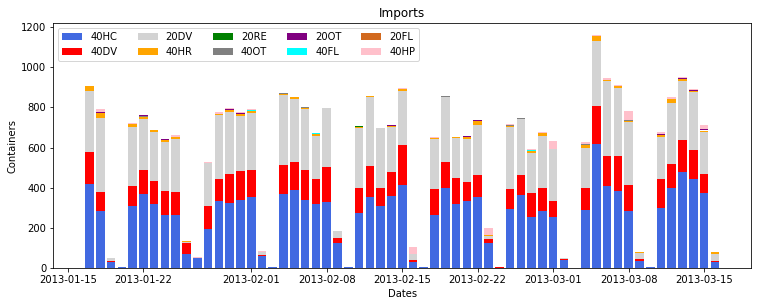

In [323]:
plt.figure(figsize=(12.5, 4.5))
plt.bar(merged_df_imp.index, merged_df_imp['40HC'], label = '40HC', color='royalblue')
plt.bar(merged_df_imp.index, merged_df_imp['40DV'], bottom=merged_df_imp['40HC'], label = '40DV', color='red')
plt.bar(merged_df_imp.index, merged_df_imp['20DV'], bottom= bottom_20DV_imp, label='20DV', color='lightgray')
plt.bar(merged_df_imp.index, merged_df_imp['40HR'], bottom=bottom_40HR_imp, label = '40HR', color='orange')
plt.bar(merged_df_imp.index, merged_df_imp['20RE'], bottom=bottom_40FL_imp, label = '20RE', color='green')
plt.bar(merged_df_imp.index, merged_df_imp['40OT'], bottom=bottom_40OT_imp, label = '40OT', color='gray')
plt.bar(merged_df_imp.index, merged_df_imp['20OT'], bottom=bottom_20OT_imp, label = '20OT', color='purple')
plt.bar(merged_df_imp.index, merged_df_imp['40FL'], bottom=bottom_40FL_imp, label = '40FL', color='cyan')
plt.bar(merged_df_imp.index, merged_df_imp['20FL'], bottom=bottom_20FL_imp, label = '20FL', color='chocolate')
plt.bar(merged_df_imp.index, merged_df_imp['40HP'], bottom=bottom_20FL_imp, label = '40HP', color='pink')
plt.xlabel('Dates')
plt.ylabel('Containers')
plt.title('Imports')
plt.legend(loc='upper left', ncol=5)
plt.grid(False)
plt.savefig('imports_container_type_wise', bbox_inches='tight')
plt.show()

In [324]:
ma_40HC_imp = merged_df_imp['40HC'].ewm(span=7, adjust=False).mean()
ma_40DV_imp = merged_df_imp['40DV'].ewm(span=7, adjust=False).mean()
ma_20DV_imp = merged_df_imp['20DV'].ewm(span=7, adjust=False).mean()

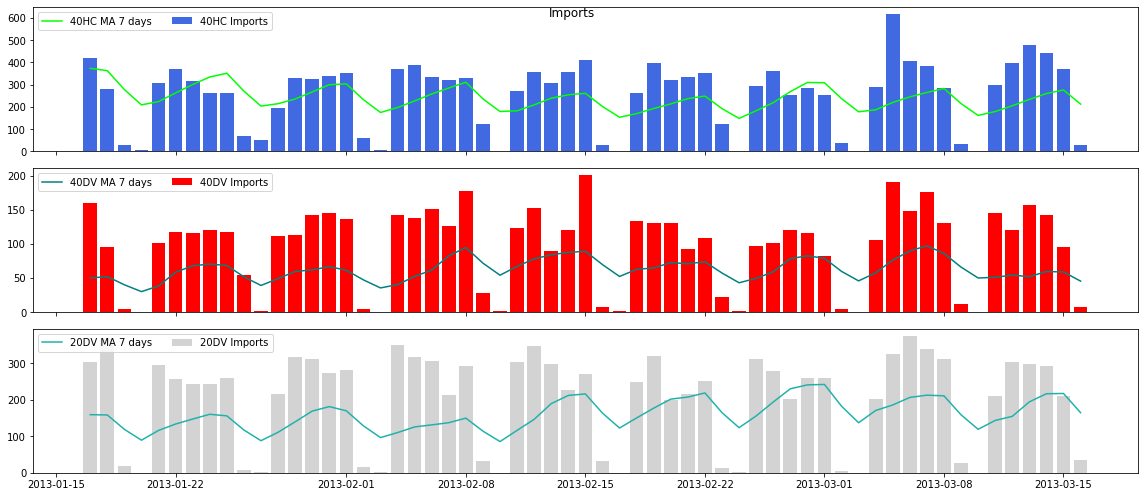

In [325]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(16, 7))

ax1.bar(merged_df_imp.index, merged_df_imp['40HC'], label = '40HC Imports', color='royalblue')
ax1.plot(ma_40HC, label='40HC MA 7 days', color='lime')
ax1.grid(False)
# ax1.set_title('40HC Exports')
ax1.legend(loc='upper left', ncol=2)

ax2.bar(merged_df_imp.index, merged_df_imp['40DV'], label = '40DV Imports', color='red')
ax2.plot(ma_40DV, label='40DV MA 7 days', color='teal')
ax2.grid(False)
# ax2.set_title('40DV')
ax2.legend(loc='upper left', ncol=2)

ax3.bar(merged_df_imp.index, merged_df_imp['20DV'], label = '20DV Imports', color='lightgray')
ax3.plot(ma_20DV, label='20DV MA 7 days', color='lightseagreen')
ax3.grid(False)
# ax3.set_title('20DV')
ax3.legend(loc='upper left', ncol=2)

plt.suptitle('Imports')
plt.tight_layout()
plt.savefig('import_container_moving_averages')
plt.show()


## Plotting importers location

In [326]:
importers_loc = imports[['City', 'City_Long', 'City_Lat']].copy()
importers_loc = importers_loc.drop_duplicates()
importers_loc

,City,City_Long,City_Lat
0,Halesowen,-2.0234,52.4594
5,Hamilton,-4.0152,55.8111
13,Huddersfield,-1.7854,53.6404
146,Lighthorne,-1.5039,52.1997
147,Merthyr Tydfil,-3.3536,51.7593
...,...,...,...
33097,Forest Row,0.0333,51.0980
33098,Aberdare,-3.4345,51.7170
33100,Foston,-1.7194,52.8831
33159,Ryton on Dunsmore,-1.4241,52.3637


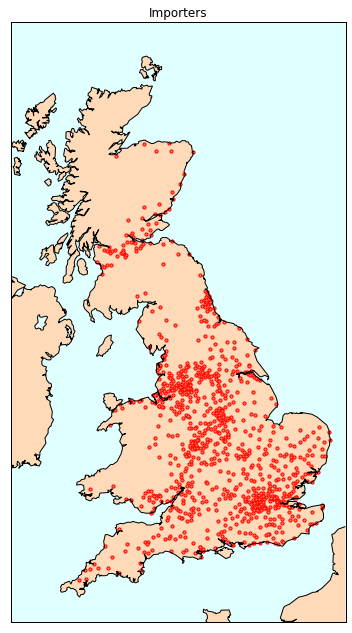

In [327]:
fig = plt.figure(figsize=(6,12))
m = Basemap(llcrnrlon=-7, llcrnrlat=49.5, urcrnrlon=3.5, urcrnrlat=59.5, resolution='i', projection='cass', lon_0=-4.36, lat_0=54.7)
m.scatter(importers_loc['City_Long'].tolist(), importers_loc['City_Lat'].tolist(), latlon=True, s=10, zorder=2, marker='o', color='coral', edgecolor='red')
m.drawcoastlines()
m.fillcontinents(color='peachpuff',lake_color='lightcyan', zorder=1)
# m.drawparallels(np.arange(-40,61.,2.))
# m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='lightcyan')
plt.savefig('importers_locations', bbox_inches='tight')
plt.title("Importers")
plt.show()

## Depots

In [328]:
csv_depots = pd.read_csv('depots.csv')

In [329]:
csv_depots.dropna(inplace=True)

In [330]:
csv_depots

,Depot,Code,long,lat,address,city,area,PostCode
1,GB Railfreight,9005,53.525700,-1.134000,C/O Tibbett & Britten Doncaster International ...,Doncaster,Doncaster,DN4 5PD
4,John Joy Welding,9041,51.479000,0.294200,Europa Trading Centre London Road,Grays,Thurrock,RM20 4DB
6,Countrywide Freight Limited,9045,51.481756,0.308941,Askew Farm Road,Grays,Thurrock,RM17 5XR
7,F/L Cleveland,8990,54.583800,-1.134300,Trunk Road Grangetown,Middlesbrough,Middlesbrough,TS6 7SDF
8,Cleveland Containers,9004,54.579600,-1.159400,Cleveland House Grangetown,Middlesbrough,Middlesbrough,TS6 6UA
...,...,...,...,...,...,...,...,...
132,Westfield Storage,9115,55.963900,-3.994300,Deerdykes Road Westfield Ind Est,Cumbernauld,North Lanarkshire,G68 9HF
135,1ST Containers UK Ltd,9118,51.517000,0.191400,MARSHVIEW IND ESTATE OFF FERRY LANE NORTH,Rainham,"Havering, Greater London",RM13 9DD
137,Maritime Transport - Off Hire,9120,51.465000,0.348300,Tilbury Railport Ferry Road,Tilbury,Essex,RM18 7NH
138,Corstor,9121,51.951500,1.334200,Sub Station Road,Felixstowe,Suffolk,IP11 3JB


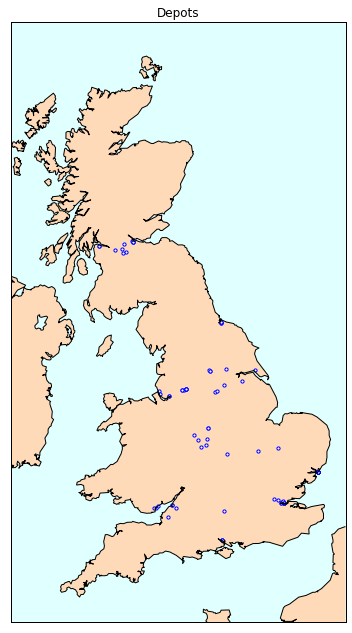

In [331]:
fig = plt.figure(figsize=(6,12))
m = Basemap(llcrnrlon=-7, llcrnrlat=49.5, urcrnrlon=3.5, urcrnrlat=59.5, resolution='i', projection='cass', lon_0=-4.36, lat_0=54.7)
m.scatter(csv_depots['lat'].tolist(), csv_depots['long'].tolist(), latlon=True, s=10, zorder=2, marker='o', color='white', edgecolor='blue')
m.drawcoastlines()
m.fillcontinents(color='peachpuff',lake_color='lightcyan', zorder=1)
# m.drawparallels(np.arange(-40,61.,2.))
# m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='lightcyan')
plt.savefig('depot_locations', bbox_inches='tight')
plt.savefig('depot_locations', bbox_inches='tight')
plt.title("Depots")
plt.show()

In [332]:
export_summary = exports['TimeStamp'].dt.date.value_counts()

In [333]:
summ = pd.DataFrame(export_summary)
summ = summ.rename(columns={'TimeStamp': 'ValueCounts'})
summ.index.names = ['Date']
summ.index = pd.to_datetime(summ.index)
summ.sort_index(inplace=True)

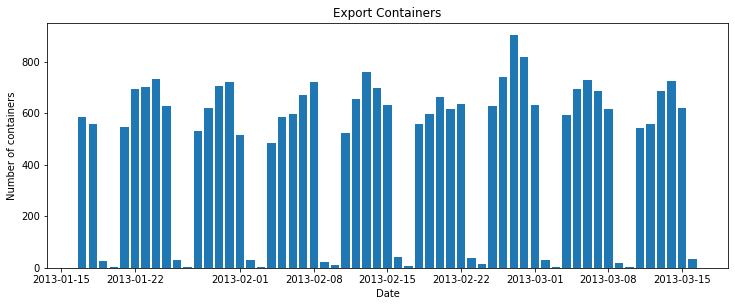

In [334]:
plt.figure(figsize=(12.2, 4.5))
plt.bar(summ.index, summ['ValueCounts'])
plt.title('Export Containers')
plt.xlabel('Date')
plt.ylabel('Number of containers')
plt.savefig('export_container')
plt.grid(False)
plt.show()

In [335]:
# print(f'last date: {exports['Time'].max()}, first date: {exports['Time'].min()}')
exports['TimeStamp'].min()

Timestamp('2013-01-17 01:00:00')

In [336]:
exports[exports['City']== 'London']

,ContainerNo,ContainerTypeSize,Import or Export,TimeStamp,Date,Port,Port_Long,Port_Lat,City,City_Long,City_Lat,Job No
34355,GLDU0715242,40HC,Export,2013-03-05 11:00:00,2013-03-05,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31316820
34356,MSCU9005340,40HC,Export,2013-03-12 15:00:00,2013-03-12,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31438010
34357,MSCU9450710,40HC,Export,2013-02-18 14:00:00,2013-02-18,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31166000
34358,MEDU8439590,40HC,Export,2013-02-11 14:00:00,2013-02-11,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31095310
34359,MSCU8329410,40HC,Export,2013-01-28 11:00:00,2013-01-28,Felixstowe,1.3141,51.9591,London,0.052,51.5367,30944630
...,...,...,...,...,...,...,...,...,...,...,...,...
60036,MEDU2254028,20DV,Export,2013-03-14 09:00:00,2013-03-14,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31417360
60037,CLHU8185514,40HC,Export,2013-03-07 10:00:00,2013-03-07,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31375580
60038,MEDU2795444,20DV,Export,2013-03-14 07:00:00,2013-03-14,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31417320
60039,MSCU3286403,20DV,Export,2013-02-19 11:00:00,2013-02-19,Felixstowe,1.3141,51.9591,London,0.052,51.5367,31187930


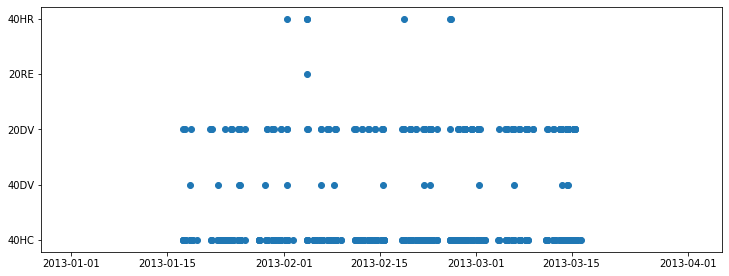

In [337]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(exports[exports['City']== 'London']['TimeStamp'],exports[exports['City']== 'London']['ContainerTypeSize'], label='Container')
# exports[exports['City']== 'London']['Time']